In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [ ]:
# all numerical values and quality is the class label, no missing values
Y = data['quality']
data.drop(['quality'],inplace = True,axis = 1)


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [ ]:
#normalization of columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_numeric = scaler.transform(data)


In [ ]:
#numpy array to dataframe conversion,here data have only numeric columns
data_numeric_df = pd.DataFrame(data_numeric,columns = data.columns)
data_numeric_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,2.132961e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [ ]:
# spliiting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_numeric_df, Y, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV

In [ ]:
#Linear Regression
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

In [ ]:
#ridge regession
model2 = Ridge()
model2.fit(x_train,y_train)
y_pred2 = model1.predict(x_test)

In [ ]:
#Lasso Regression
model3 = Lasso()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

In [ ]:
#ridge cv, cv = 5 means it is splitting the data in to 5 folds. the results are the average of 5 models = 0.36 for final model
model4 = RidgeCV(cv = 5)
model4.fit(data_numeric_df,Y)
model4.score(data_numeric_df,Y)

0.3605354538737314

In [ ]:
# alpha is regularisation parameter which is absent for linear regression and present for lasso and ridge
model2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
# more alphas bcoz of CV, may be for other two models the values are these only
model4.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
error_linearReg = mean_squared_error(y_pred1, y_test)
error_ridgeReg = mean_squared_error(y_pred1, y_test)
error_lassoReg = mean_squared_error(y_pred1, y_test)
error_ridgecv

In [ ]:
model1.coef_

array([ 0.06460619, -0.18750336, -0.02852572,  0.02500429, -0.10577287,
        0.04436964, -0.10097489, -0.05251762, -0.05622391,  0.17960026,
        0.27033214])

In [ ]:
# in ridge the model wont makes the weights as zeros
model2.coef_

array([ 0.06469165, -0.18731578, -0.02819875,  0.02505607, -0.10569268,
        0.04425153, -0.10087447, -0.05276362, -0.05598826,  0.17947859,
        0.27000188])

In [ ]:
# lasso is for picking important columns, and it makes the weights as zero for unimportant columns
model3.coef_

array([ 0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.])

In [ ]:
model3.intercept_

5.638780297107115

R^2 score:  0.36458302773858875


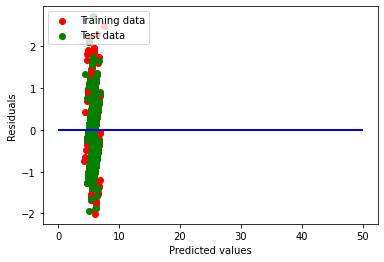

In [ ]:
#plotting for linear regression
print('R^2 score: ',model1.score(x_train, y_train)) 
# Plot regression line and scatter 
# x = model predictions and y = error
plt.scatter(x=model1.predict(x_train), y=model1.predict(x_train)-y_train,c='red', marker='o', label='Training data') 
plt.scatter(x=model1.predict(x_test), y=model1.predict(x_test)-y_test,c='green', marker='o', label='Test data') 
plt.hlines(y=0,xmin = 0, xmax = 50, lw=2, color='blue') 
plt.xlabel('Predicted values') 
plt.ylabel('Residuals') 
plt.legend(loc='upper left') 
plt.show()

In [ ]:
#plotting for ridge regression
print('R^2 score: ',model2.score(x_train, y_train)) 
# Plot regression line and scatter 
# x = model predictions and y = error
plt.scatter(x=model2.predict(x_train), y=model2.predict(x_train)-y_train,c='red', marker='o', label='Training data') 
plt.scatter(x=model2.predict(x_test), y=model2.predict(x_test)-y_test,c='green', marker='o', label='Test data') 
plt.hlines(y=0,xmin = 0, xmax = 50, lw=2, color='blue') 
plt.xlabel('Predicted values') 
plt.ylabel('Residuals') 
plt.legend(loc='upper left') 
plt.show()

R^2 score:  0.0


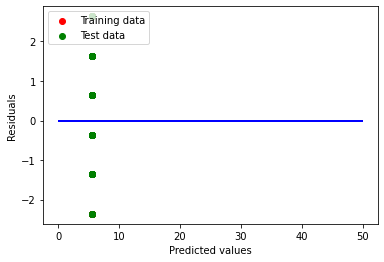

In [ ]:
#plotting for lasso regression
print('R^2 score: ',model3.score(x_train, y_train)) 
# Plot regression line and scatter 
# x = model predictions and y = error
plt.scatter(x=model3.predict(x_train), y=model3.predict(x_train)-y_train,c='red', marker='o', label='Training data') 
plt.scatter(x=model3.predict(x_test), y=model3.predict(x_test)-y_test,c='green', marker='o', label='Test data') 
plt.hlines(y=0,xmin = 0, xmax = 50, lw=2, color='blue') 
plt.xlabel('Predicted values') 
plt.ylabel('Residuals') 
plt.legend(loc='upper left') 
plt.show()